In [3]:
import pandas as pd
import numpy as np
import datetime

In [24]:

listings = pd.read_csv(r"C:\Users\filokaizen\OneDrive - Tajamar\Desktop\ii\Airbnb-Madrid\listings.csv")


In [25]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [26]:
listings["id"].value_counts().max()

1

In [28]:
listings.columns = [e.lower().strip().replace(" ", "")for e in listings.columns]

# e.lower : pongo todas las columnas en minúsculas
#strip, sustituye en ambos lados 


In [29]:
viviendas = listings.drop(["host_name","number_of_reviews","last_review","reviews_per_month","availability_365"] , axis = 1)
#Elimino las columas que no necesito

In [30]:
viviendas.duplicated() # compruebo si hay valores duplicados

0        False
1        False
2        False
3        False
4        False
         ...  
19613    False
19614    False
19615    False
19616    False
19617    False
Length: 19618, dtype: bool

In [31]:
viviendas.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,1
1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,7
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1


In [ ]:
viviendas = viviendas.dropna() # elimino valores nulos, si quiero eliminar solo columnas pongo dropna(axis=1)


In [32]:
viviendas.shape

(19618, 11)

In [33]:
viviendas = viviendas.rename(columns={'calculated_host_listings_count': 'host_id_times'})
viviendas = viviendas.rename(columns={'id': 'id_add'})



In [35]:
viviendas.head()

,id_add,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,host_id_times
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,1
1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,7
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1


In [36]:
viviendas["host_id"].value_counts().max() # La persona que más veces ha alquilado una vivienda en concreto 163
 # veo cuantas veces se repite cada valor de host_id se puede obsevar 
# cada persona (host) alquila una vivienda/ habitación 

163

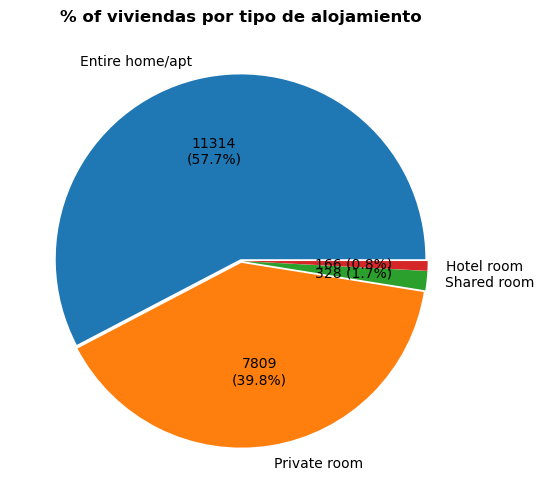

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
pie_data = viviendas['room_type'].value_counts()

pie_data.plot(kind='pie',
              autopct=lambda v: ('{}'.format(int(v/100*sum(pie_data))) +
                                 '\n' * int(v > 10) + ' ' * int(v <= 10) +
                                 '({:.1%})'.format(v/100)),
              explode=(0.01, ) * len(pie_data),
              ax=ax)

ax.set_ylabel('')
ax.set_title('% of viviendas por tipo de alojamiento', weight='bold')
plt.show()

In [38]:
viviendas = viviendas.rename(columns={'neighbourhood_group': "district"})


In [39]:
viviendas["district"].value_counts() # Cuento que barrio es que el más viviendas tiene 

Centro                   8649
Salamanca                1324
Chamberí                 1252
Arganzuela               1104
Tetuán                    816
Carabanchel               708
Retiro                    664
Ciudad Lineal             649
Puente de Vallecas        617
Latina                    608
Chamartín                 580
Moncloa - Aravaca         554
San Blas - Canillejas     497
Hortaleza                 364
Fuencarral - El Pardo     315
Usera                     280
Villaverde                177
Barajas                   172
Moratalaz                 118
Villa de Vallecas          98
Vicálvaro                  72
Name: district, dtype: int64

Text(0.5, 0, '# Flats')

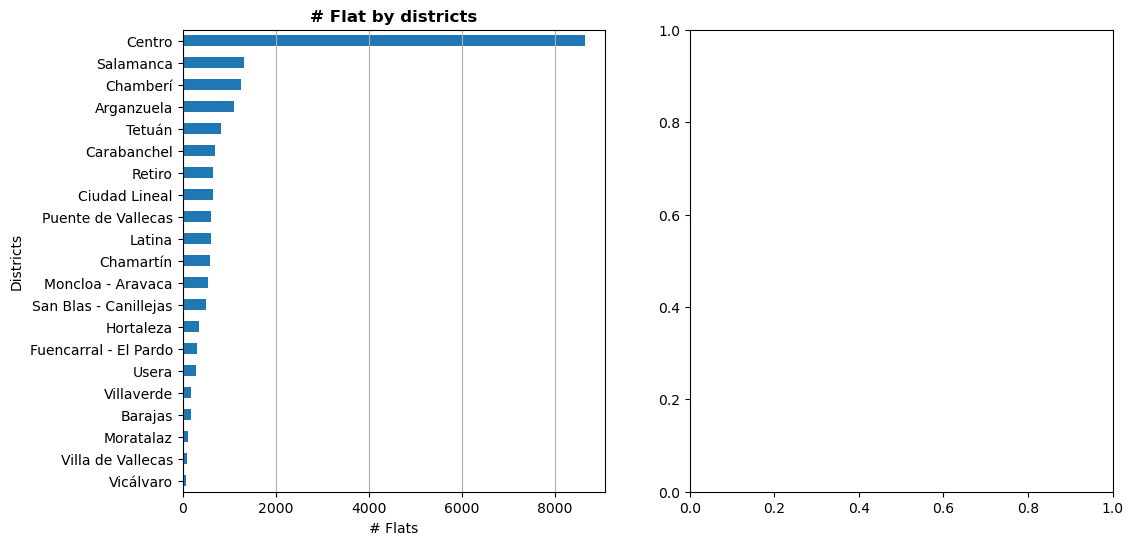

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

n_listings_per_district = viviendas["district"].value_counts()

(n_listings_per_district.iloc[::-1]).plot(kind='barh', ax=ax1)

ax1.grid(axis='x')

# Aqui va el título y las etiquetas del gráfico 
ax1.set_title('# Flat by districts', weight='bold')
ax1.set_ylabel('Districts')
ax1.set_xlabel('# Flats')


In [41]:
viviendas.head()

,id_add,name,host_id,district,neighbourhood,latitude,longitude,room_type,price,minimum_nights,host_id_times
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,1
1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,2
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,7
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,1
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,1


Calendar rayadas

In [58]:
calendar = pd.read_csv(r"C:\Users\filokaizen\OneDrive - Tajamar\Desktop\ii\Airbnb-Madrid\calendar.csv")


In [59]:
calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [60]:
calendar = calendar.rename(columns={'listing_id': 'id_add'})


In [61]:
calendar['date'] = pd.to_datetime(calendar['date']) # transformo el tipo de dato, de objeto o str a datetime64


In [62]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7161256 entries, 0 to 7161255
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id_add          int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           object        
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 382.5+ MB


In [70]:
calendar = viviendas.merge(calendar[['date', 'available']], left_on='id_add', right_index=True, how='left')


In [71]:
calendar_merge = calendar

In [72]:
calendar_merge["room_type"].value_counts()

Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: room_type, dtype: int64

In [73]:
calendar_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_add          19618 non-null  int64         
 1   name            19615 non-null  object        
 2   host_id         19618 non-null  int64         
 3   district        19618 non-null  object        
 4   neighbourhood   19618 non-null  object        
 5   latitude        19618 non-null  float64       
 6   longitude       19618 non-null  float64       
 7   room_type       19618 non-null  object        
 8   price           19618 non-null  int64         
 9   minimum_nights  19618 non-null  int64         
 10  host_id_times   19618 non-null  int64         
 11  date            0 non-null      datetime64[ns]
 12  available       0 non-null      object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.9+ MB


In [74]:
calendar_merge.to_csv("calendar_merge.csv", encoding="utf-8")
